In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df=pd.read_excel('2120_0.xlsx', skiprows=2,skipfooter=16)
df.rename(columns={'Renda (R$) no ano de exibição':'Renda'},inplace=True)
df.head()

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda
0,2017,#Screamers,Ficção,Estados Unidos,Estrangeiros,2017-11-30 00:00:00,Cineart Filmes,Distribuição Nacional,714,9437.45
1,2017,10 Centavos para o Número da Besta,Documentário,Brasil,Brasileiros,2017-11-28 00:00:00,Ponto de Equilíbrio,Distribuição Nacional,7,63.00
2,2017,120 batimentos por minuto,Ficção,França,Estrangeiros,2018-01-04 00:00:00,Imovision,Distribuição Nacional,262,3791.63
3,2017,13 Minutos,Ficção,Alemanha,Estrangeiros,2016-11-03 00:00:00,Alphaville Filmes,Distribuição Nacional,620,6463.50
4,2017,150 Miligramas,Ficção,França,Estrangeiros,2017-08-31 00:00:00,Califórnia,Distribuição Nacional,771,10508.71


In [11]:
df.tail()

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda
5686,2009,X-Men Origens: Wolverine,Ficção,Estados Unidos,Estrangeiros,2009-05-01 00:00:00,Fox,Distribuição Internacional,3199434,27352313.00
5687,2009,Xuxa em o Mistério de Feiurinha,Ficção,Brasil,Brasileiros,2009-12-25 00:00:00,Playarte,Distribuição Nacional,250109,1766416.65
5688,2009,Xuxa em Sonho de Menina,Ficção,Brasil,Brasileiros,2007-12-21 00:00:00,Warner,Distribuição Internacional,8914,26880.00
5689,2009,Xuxa Gêmeas,Ficção,Brasil,Brasileiros,2006-12-15 00:00:00,Fox,Distribuição Internacional,1671,5013.00
5690,2009,Zico na Rede,Documentário,Brasil,Brasileiros,2009-07-03 00:00:00,Business Telecom,Distribuição Nacional,546,2529.50


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5691 entries, 0 to 5690
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ano de exibição                  5691 non-null   int64  
 1   Título da obra                   5691 non-null   object 
 2   Gênero                           5691 non-null   object 
 3   País(es) produtor(es) da obra    5691 non-null   object 
 4   Nacionalidade da obra            5691 non-null   object 
 5   Data de lançamento               5691 non-null   object 
 6   Distribuidora                    5691 non-null   object 
 7   Origem da empresa distribuidora  5691 non-null   object 
 8   Público no ano de exibição       5691 non-null   int64  
 9   Renda                            5691 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 444.7+ KB


In [13]:
df['Data de lançamento'].value_counts()

Relançamento           175
2012-12-21 00:00:00     33
2015-12-03 00:00:00     33
2013-11-29 00:00:00     29
2012-11-02 00:00:00     27
                      ... 
2008-04-18 00:00:00      1
2011-03-09 00:00:00      1
2009-03-21 00:00:00      1
2010-02-06 00:00:00      1
2002-12-27 00:00:00      1
Name: Data de lançamento, Length: 759, dtype: int64

In [14]:
df[df['Data de lançamento']=='Relançamento'].head()

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda
7,2017,8½,Ficção,"França, Itália",Estrangeiros,Relançamento,F. J. Cines,Distribuição Nacional,29,196.00
11,2017,A bela da tarde,Ficção,"França, Itália",Estrangeiros,Relançamento,Zeta Filmes,Distribuição Nacional,3011,42839.31
36,2017,A História sem Fim,Ficção,"Alemanha, Estados Unidos",Estrangeiros,Relançamento,F. J. Cines,Distribuição Nacional,797,6969.00
53,2017,A primeira noite de um homem,Ficção,Estados Unidos,Estrangeiros,Relançamento,Zeta Filmes,Distribuição Nacional,12,96.00
128,2017,Ballet Bolshoi: A bela adormecida,Vídeomusical,Inglaterra,Estrangeiros,Relançamento,UCI,Distribuição Nacional,1504,41391.00


In [17]:
df_novo=df[df['Data de lançamento']!='Relançamento'].copy()
df_novo.shape

(5516, 10)

In [19]:
df_novo['Data de lançamento']=pd.to_datetime(df_novo['Data de lançamento'])
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5516 entries, 0 to 5690
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ano de exibição                  5516 non-null   int64         
 1   Título da obra                   5516 non-null   object        
 2   Gênero                           5516 non-null   object        
 3   País(es) produtor(es) da obra    5516 non-null   object        
 4   Nacionalidade da obra            5516 non-null   object        
 5   Data de lançamento               5516 non-null   datetime64[ns]
 6   Distribuidora                    5516 non-null   object        
 7   Origem da empresa distribuidora  5516 non-null   object        
 8   Público no ano de exibição       5516 non-null   int64         
 9   Renda                            5516 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory

In [20]:
df_novo['Data de lançamento'].dt.year.value_counts()

2013    669
2015    646
2014    619
2016    613
2011    553
2012    539
2009    503
2017    487
2010    475
2008    225
2007     61
2006     49
2005     29
2018     17
2004     10
2002      6
2001      5
2003      4
1999      3
2000      2
1998      1
Name: Data de lançamento, dtype: int64

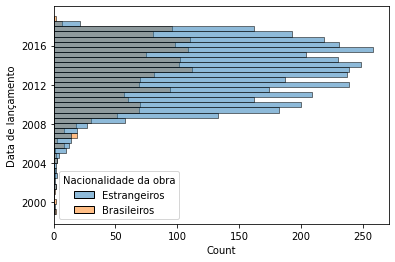

In [22]:
sns.histplot(data=df_novo,y='Data de lançamento',hue='Nacionalidade da obra')
plt.show()

In [24]:
#top5 filmes com maior renda
df_novo[df_novo['Renda']==df_novo['Renda'].max()]

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda
2249,2015,Vingadores: A Era de Ultron,Ficção,Estados Unidos,Estrangeiros,2015-04-23,Disney,Distribuição Internacional,10129071,146184931.0


In [25]:
df_novo[df_novo['Renda']==df_novo['Renda'].min()]

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda
2277,2014,A Batalha do passinho,Documentário,Brasil,Brasileiros,2013-10-11,Cine Santa Teresa,Distribuição Nacional,355,0.0
2608,2014,Mar negro,Ficção,Brasil,Brasileiros,2014-01-17,Petrini,Distribuição Nacional,0,0.0
2728,2014,O Último Lance do Leilão,Ficção,Brasil,Brasileiros,2014-05-01,Sam Rádio Pictures,Distribuição Nacional,0,0.0
3041,2013,As horas vulgares,Ficção,Brasil,Brasileiros,2013-08-09,Petrini,Distribuição Nacional,0,0.0
3058,2013,Beije-me outra vez,Ficção,Itália,Estrangeiros,2013-05-10,Petrini,Distribuição Nacional,0,0.0
3105,2013,Crazy Horse,Ficção,Estados Unidos,Estrangeiros,2013-06-28,Petrini,Distribuição Nacional,0,0.0
3390,2013,Quase um tango,Ficção,Brasil,Brasileiros,2013-08-16,NGM Produções,Distribuição Nacional,0,0.0
3459,2013,Todos os Dias,Ficção,Reino Unido,Estrangeiros,2014-01-24,Esfera Produções,Distribuição Nacional,0,0.0
3603,2012,Apenas entre Nós,Ficção,"França, Eslovênia, Sérvia, Croácia",Estrangeiros,2015-05-07,Lume,Distribuição Nacional,0,0.0
3627,2012,Ataque ao prédio,Ficção,Reino Unido,Estrangeiros,2012-01-13,Sony,Distribuição Internacional,0,0.0


In [40]:
df_novo.nlargest(3,'Renda')

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda
2249,2015,Vingadores: A Era de Ultron,Ficção,Estados Unidos,Estrangeiros,2015-04-23,Disney,Distribuição Internacional,10129071,1.461849e+08
893,2016,Capitão América: Guerra civil,Ficção,Estados Unidos,Estrangeiros,2016-04-28,Disney,Distribuição Internacional,9617572,1.433370e+08
2242,2015,Velozes e Furiosos 7,Ficção,Estados Unidos,Estrangeiros,2015-04-02,Universal,Distribuição Internacional,9857946,1.424659e+08


In [47]:
filmes2017=df_novo[df_novo['Data de lançamento'].dt.year==2017]
filmes2017['Renda'].sum()

2616173229.9700003

In [55]:
format_mapping = {'Renda': 'R$ {:,.2f}'}

filmes2017.style.format(format_mapping)

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda
0,2017,#Screamers,Ficção,Estados Unidos,Estrangeiros,2017-11-30 00:00:00,Cineart Filmes,Distribuição Nacional,714,"R$ 9,437.45"
1,2017,10 Centavos para o Número da Besta,Documentário,Brasil,Brasileiros,2017-11-28 00:00:00,Ponto de Equilíbrio,Distribuição Nacional,7,R$ 63.00
4,2017,150 Miligramas,Ficção,França,Estrangeiros,2017-08-31 00:00:00,Califórnia,Distribuição Nacional,771,"R$ 10,508.71"
5,2017,2:22 - Encontro marcado,Ficção,"Austrália, Estados Unidos",Estrangeiros,2017-09-07 00:00:00,Playarte,Distribuição Nacional,30662,"R$ 491,454.28"
6,2017,7 desejos,Ficção,Estados Unidos,Estrangeiros,2017-07-27 00:00:00,Imagem,Distribuição Nacional,249452,"R$ 3,427,649.60"
9,2017,A Autópsia,Ficção,"Estados Unidos, Reino Unido",Estrangeiros,2017-05-04 00:00:00,Diamond Films do Brasil,Distribuição Nacional,214035,"R$ 2,984,333.52"
10,2017,A Bailarina,Animação,"Canadá, França",Estrangeiros,2017-01-26 00:00:00,Paris,Distribuição Nacional,549229,"R$ 7,637,393.22"
12,2017,A Bela e a Fera (2017),Ficção,Estados Unidos,Estrangeiros,2017-03-16 00:00:00,Disney,Distribuição Internacional,8308489,"R$ 130,084,653.00"
13,2017,A Cabana,Ficção,Estados Unidos,Estrangeiros,2017-04-06 00:00:00,Paris,Distribuição Nacional,5117598,"R$ 74,766,207.69"
16,2017,A cidade onde envelheço,Ficção,"Portugal, Brasil",Brasileiros,2017-02-09 00:00:00,Vitrine Filmes,Distribuição Nacional,9078,"R$ 70,279.30"


In [58]:
filmes2017.to_excel('Filmes2017.xlsx',index=False)